# Učitavanje pdataka

In [53]:
import pandas as pd

In [54]:
titanic = pd.read_csv('titanic3.csv')

In [55]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [56]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [57]:
titanic.survived.value_counts()

0    809
1    500
Name: survived, dtype: int64

In [58]:
survival_percent = 500/1309
print("Procenat preživelih putnika:" ,round(survival_percent*100,2),"%")

Procenat preživelih putnika: 38.2 %


In [59]:
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

# Čišćenje podataka

Koje kolone imaju NaN vrednosti i koliko?

In [60]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Kolona "fare" ima samo jednu NaN vednost, pa sam odlučila da je popunim sa srednjom vrednošću.

In [61]:
titanic.fare = titanic.fare.fillna(titanic.fare.mean(skipna=True))

Kolona "embarked" ima samo 2 NaN vrednosti koje sam popunila sa najčešćom vrednošću u setu podataka.

In [62]:
titanic.embarked.value_counts()

S    914
C    270
Q    123
Name: embarked, dtype: int64

In [63]:
titanic.embarked = titanic.embarked.fillna("S")

In [64]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

Kolona "cabin" bi možda mogla da se iskoristi. Slovo koje ide uz broj kabine predstavlja različite palube, a ta informacija bi možda mogla da ima uticaj na verovatnoću preživljavanja. Zato ću da izdvojim samo slovo i to iskoristim kao novi podatak.

In [65]:
titanic.cabin = titanic.cabin.str.slice(stop=1)

In [66]:
titanic.head(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
5,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.5500,E,S,3,NaN,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,77.9583,D,S,10,NaN,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0000,A,S,NaN,NaN,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.4792,C,S,D,NaN,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay"


Kolona "age" ima 263 NaN vrednosti, što je ipak značajan deo dataset-a. Zbog toga ćemo nedostajuće vrednosti popuniti nasumičnim vrednostima uzetim u opsegu min i max broja godina sa srednjom vrednošću iz originalnog dataset-a.

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

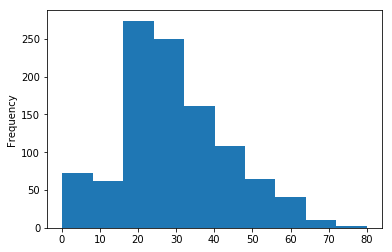

In [67]:
%matplotlib inline
titanic.age.plot(kind='hist')
titanic.age.describe()

In [68]:
import numpy as np
def fillNaN_with_unifrand(df):
    a = df.values
    m = np.isnan(a) # mask of NaNs
    mu, sigma = df.mean(skipna=True), df.std(skipna=True)
    a[m] = np.random.normal(mu, sigma, size=m.sum())
    return df

In [69]:
fillNaN_with_unifrand(titanic.age)
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

count    1309.000000
mean       30.133246
std        14.469354
min        -5.587260
25%        21.000000
50%        28.722834
75%        39.000000
max        83.264488
Name: age, dtype: float64

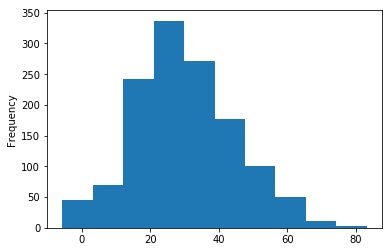

In [70]:
titanic.age.plot(kind='hist')
titanic.age.describe()

# Transformisanje podataka

Sada pravim novi dataframe, koji sadrži samo kolone koje po meni imaju veću važnost za predviđanje toga da li je osoba preživela ili ne.

In [71]:
titanic.drop(['name','ticket','boat','body','home.dest','cabin'],axis=1,inplace=True)

In [72]:
titanic.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,female,29.00,0,0,211.3375,S
1,1,1,male,0.92,1,2,151.5500,S
2,1,0,female,2.00,1,2,151.5500,S
3,1,0,male,30.00,1,2,151.5500,S
4,1,0,female,25.00,1,2,151.5500,S
5,1,1,male,48.00,0,0,26.5500,S
6,1,1,female,63.00,1,0,77.9583,S
7,1,0,male,39.00,0,0,0.0000,S
8,1,1,female,53.00,2,0,51.4792,S
9,1,0,male,71.00,0,0,49.5042,C


Kolona "sibsp" sadrži informacije o tome da li ta osoba ima braće, sestara i/ili supružnika na brodu a "parch" sadrži informaciju o tome da li ta osoba ima na brodu roditelje i/ili decu. Odlučila sam da spojim ove dve kolone i da ta nova kolona govori o tome samo da li je ta osoba sama na brodu ili nije.

In [73]:
alone = []
for i,j in zip(titanic.sibsp.values, titanic.parch.values):
    if (i==0) and (j == 0):
        alone.append(1)
    else:
        alone.append(0)

In [74]:
alone = pd.Series(alone)

In [75]:
titanic = pd.concat([titanic,alone], axis=1)
titanic.rename(columns = {0:'alone'}, inplace=True)

In [76]:
relatives = titanic.sibsp + titanic.parch

Takođe sam kreirala kolonu koja govori o broju rođaka po osobi.

In [77]:
relatives = titanic.sibsp + titanic.parch
titanic = pd.concat([titanic,relatives], axis=1)
titanic.rename(columns = {0:'relatives'}, inplace=True)

In [78]:
titanic.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,embarked,alone,relatives
0,1,1,female,29.00,0,0,211.3375,S,1,0
1,1,1,male,0.92,1,2,151.5500,S,0,3
2,1,0,female,2.00,1,2,151.5500,S,0,3
3,1,0,male,30.00,1,2,151.5500,S,0,3
4,1,0,female,25.00,1,2,151.5500,S,0,3
5,1,1,male,48.00,0,0,26.5500,S,1,0
6,1,1,female,63.00,1,0,77.9583,S,0,1
7,1,0,male,39.00,0,0,0.0000,S,1,0
8,1,1,female,53.00,2,0,51.4792,S,0,2
9,1,0,male,71.00,0,0,49.5042,C,1,0


Pošto su nam se prilikom generisanja random brojeva javile negativne vrednosti za godine, njih bi trebalo izbaciti iz dataset-a.

In [79]:
to_delete = titanic.age[titanic.age<0]
print("Ima",len(to_delete),"negativnih vrednosti")

Ima 4 negativnih vrednosti


In [80]:
titanic.drop(to_delete.index, inplace=True)

count    1305.000000
mean       30.236660
std        14.369717
min         0.170000
25%        21.000000
50%        28.994354
75%        39.000000
max        83.264488
Name: age, dtype: float64

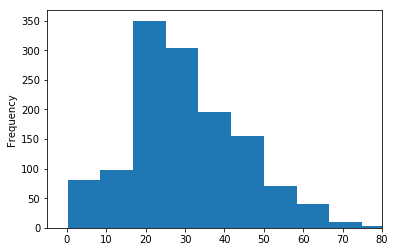

In [81]:
titanic.age.plot(kind='hist',xlim=(-5,80))
titanic.age.describe()

In [82]:
to_delete = titanic.age[titanic.age<0]
print("Ima",len(to_delete),"negativnih vrednosti")

Ima 0 negativnih vrednosti


# Istraživanje podataka

[Text(0,0.5,'Verovatnoća preživljavanja'), Text(0.5,0,'Klasa')]

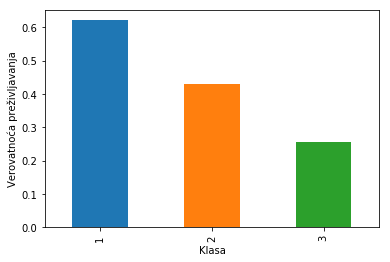

In [83]:
plot = titanic.groupby('pclass').survived.mean().plot(kind='bar')
plot.set(xlabel="Klasa", ylabel="Verovatnoća preživljavanja")

[Text(0,0.5,'Verovatnoća preživljavanja'), Text(0.5,0,'Pol')]

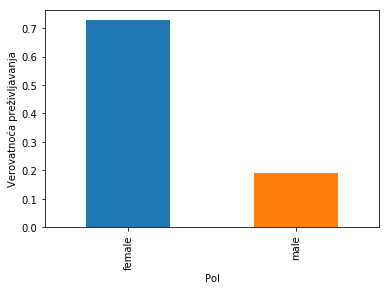

In [84]:
plot = titanic.groupby('sex').survived.mean().plot(kind='bar')
plot.set(xlabel="Pol", ylabel="Verovatnoća preživljavanja")

In [85]:
titanic.sex.value_counts()

male      839
female    466
Name: sex, dtype: int64

[Text(0,0.5,'Prosečan broj rođaka'), Text(0.5,0,'Pol')]

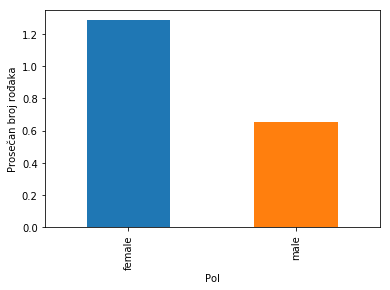

In [86]:
plot = titanic.groupby('sex').relatives.mean().plot(kind='bar')
# Ima brojcano vise muskaraca, ali zene mnogo cesce idu sa rodjacima.

plot.set(xlabel="Pol", ylabel="Prosečan broj rođaka")

[Text(0,0.5,'Verovatnoća preživljavanja'), Text(0.5,0,'Broj rođaka')]

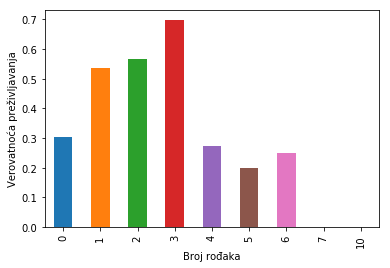

In [87]:
plot = titanic.groupby('relatives').survived.mean().plot(kind='bar')
plot.set(xlabel="Broj rođaka", ylabel="Verovatnoća preživljavanja")

[Text(0,0.5,'Verovatnoća preživljavanja'),
 Text(0.5,0,'0 - nije sam/a, 1 - sam/a')]

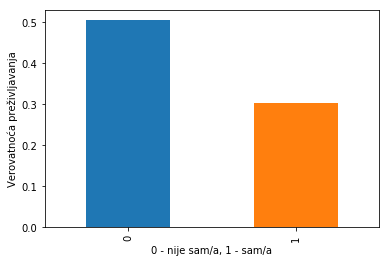

In [88]:
plot = titanic.groupby('alone').survived.mean().plot(kind='bar')
plot.set(xlabel="0 - nije sam/a, 1 - sam/a", ylabel="Verovatnoća preživljavanja")

Text(0,0.5,'Cena karte [Britanske funte]')

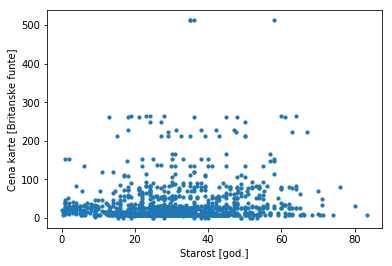

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(titanic.age,titanic.fare,10)
plt.xlabel("Starost [god.]")
plt.ylabel("Cena karte [Britanske funte]")

[Text(0,0.5,'Srednja vrednost skalirane starosti'), Text(0.5,0,'Klasa')]

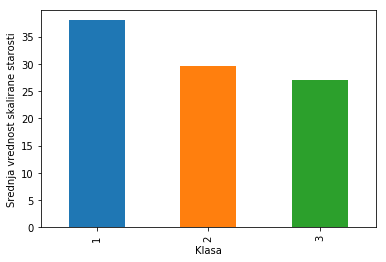

In [90]:
plot = titanic.groupby('pclass').age.mean().plot(kind='bar')
plot.set(xlabel="Klasa", ylabel="Srednja vrednost skalirane starosti")
# Starije osobe su češće pripadnici više klase.

In [91]:
titanic.dtypes

pclass         int64
survived       int64
sex           object
age          float64
sibsp          int64
parch          int64
fare         float64
embarked      object
alone          int64
relatives      int64
dtype: object

Kolone koje imaju kategoričke vrednosti transformišem na sledeći način radi lakšeg korišćenja u ML algoritmima.

In [92]:
titanic = pd.get_dummies(titanic, columns=['sex','embarked'], drop_first=True)

In [93]:
titanic.head()

,pclass,survived,age,sibsp,parch,fare,alone,relatives,sex_male,embarked_Q,embarked_S
0,1,1,29.00,0,0,211.3375,1,0,0,0,1
1,1,1,0.92,1,2,151.5500,0,3,1,0,1
2,1,0,2.00,1,2,151.5500,0,3,0,0,1
3,1,0,30.00,1,2,151.5500,0,3,1,0,1
4,1,0,25.00,1,2,151.5500,0,3,0,0,1


## Skaliranje podataka

In [94]:
def featureScaling(features):
    new=[]
    if min(features)!= max(features):
        for n in features:
            n = float(n)
            result = round((n-float(min(features)))/(float(max(features))-float(min(features))),2)
            new.append(result)
        return new
    else:
        result = "You don't have to rescale this feature!"
        return result

In [95]:
titanic.age = featureScaling(titanic.age)
titanic.fare = featureScaling(titanic.fare)

In [96]:
titanic.head()

,pclass,survived,age,sibsp,parch,fare,alone,relatives,sex_male,embarked_Q,embarked_S
0,1,1,0.35,0,0,0.41,1,0,0,0,1
1,1,1,0.01,1,2,0.30,0,3,1,0,1
2,1,0,0.02,1,2,0.30,0,3,0,0,1
3,1,0,0.36,1,2,0.30,0,3,1,0,1
4,1,0,0.30,1,2,0.30,0,3,0,0,1


In [97]:
titanic.corr()

,pclass,survived,age,sibsp,parch,fare,alone,relatives,sex_male,embarked_Q,embarked_S
pclass,1.000000,-0.313366,-0.306652,0.057055,0.016814,-0.556022,0.149264,0.046553,0.125033,0.230822,0.091626
survived,-0.313366,1.000000,-0.059892,-0.024879,0.083188,0.241272,-0.201457,0.029755,-0.527849,-0.016866,-0.149203
age,-0.306652,-0.059892,1.000000,-0.161317,-0.134581,0.145885,0.119889,-0.179754,0.073234,-0.002584,-0.078029
sibsp,0.057055,-0.024879,-0.161317,1.000000,0.370921,0.158157,-0.596287,0.858079,-0.115332,-0.048242,0.072330
parch,0.016814,0.083188,-0.134581,0.370921,1.000000,0.218240,-0.548021,0.795166,-0.213943,-0.100986,0.071773
fare,-0.556022,0.241272,0.145885,0.158157,0.218240,1.000000,-0.268681,0.223951,-0.184236,-0.123603,-0.168745
alone,0.149264,-0.201457,0.119889,-0.596287,-0.548021,-0.268681,1.000000,-0.692395,0.284476,0.127701,0.013672
relatives,0.046553,0.029755,-0.179754,0.858079,0.795166,0.223951,-0.692395,1.000000,-0.193611,-0.087342,0.086918
sex_male,0.125033,-0.527849,0.073234,-0.115332,-0.213943,-0.184236,0.284476,-0.193611,1.000000,-0.088006,0.113872
embarked_Q,0.230822,-0.016866,-0.002584,-0.048242,-0.100986,-0.123603,0.127701,-0.087342,-0.088006,1.000000,-0.491411


## Kreiranje trening i test seta

In [369]:
titanic_targets = titanic.loc[:,'survived']

Odlučila sam da izbacim kolonu "alone" jer je u jakoj korelaciji sa "relatives" zbog čega ne doprinosi modelu novim informacijama.

In [370]:
titanic_features = titanic.drop(['survived','sibsp','parch','alone'], axis=1)

In [371]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(titanic_features, titanic_targets, test_size = 0.25, random_state=0)

In [372]:
x_train.head()

,pclass,age,fare,relatives,sex_male,embarked_Q,embarked_S
82,1,0.45,0.14,2,0,0,1
1293,3,0.70,0.02,0,1,0,1
860,3,0.32,0.02,0,0,0,1
815,3,0.34,0.03,0,1,0,1
588,2,0.05,0.04,2,0,0,1


In [373]:
x_test.head()

,pclass,age,fare,relatives,sex_male,embarked_Q,embarked_S
584,2,0.41,0.03,0,0,0,1
198,1,0.22,0.10,1,0,0,1
829,3,0.20,0.09,7,0,0,1
1149,3,0.25,0.02,0,0,1,0
390,2,0.21,0.14,0,1,0,1


In [374]:
y_train.head()

82      1
1293    0
860     1
815     0
588     1
Name: survived, dtype: int64

In [375]:
y_test.head()

584     1
198     1
829     0
1149    1
390     0
Name: survived, dtype: int64

# Kreiranje modela

## Support Vector Machines

In [376]:
from sklearn.svm import SVC

In [377]:
clf = SVC(kernel='rbf', C=1)
#clf = SVC(kernel='linear')
clf = clf.fit(x_train,y_train)

In [378]:
from sklearn.metrics import accuracy_score
pred = clf.predict(x_test)
accuracy_svm = accuracy_score(y_test, pred)

from sklearn.model_selection import cross_val_score
scores_svm = cross_val_score(clf,titanic_features,titanic_targets, cv=4)

from sklearn.metrics import f1_score
F1_svm = f1_score(y_test,pred)

In [379]:
print('accuracy:',accuracy_svm)
print("Cross validation: %0.2f (+/- %0.2f)" % (scores_svm.mean(), scores_svm.std() * 2))

accuracy: 0.8012232415902141
Cross validation: 0.70 (+/- 0.19)


In [380]:
pred_train = clf.predict(x_train)
accuracy_train = accuracy_score(y_train,pred_train)

In [381]:
accuracy_train

0.7995910020449898

In [382]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)


array([[187,  20],
       [ 45,  75]], dtype=int64)

In [383]:
TN, FP, FN, TP = confusion_matrix(y_test,pred).ravel()

In [384]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

classification_err_svm = 1 - accuracy_score(y_test, pred)
recall_svm = recall_score(y_test, pred)
specificity_svm = TN / float(TN + FP)
FP_rate_svm = FP / float(TN + FP)
precision_svm = precision_score(y_test, pred)
print('Classification error:', round(classification_err_svm*100,2),'%') # How often is the classifier incorrect?
print('Recall:', round(recall_svm*100,2),'%') # When the actual value is positive, how often is the prediction correct?
print('Specificity:', round(specificity_svm*100,2),'%') # When the actual value is negative, how often is the prediction correct?
print('FP rate:', round(FP_rate_svm*100,2),'%') # When the actual value is negative, how often is the prediction incorrect?
print('Precision:', round(precision_svm*100,2),'%') # When a positive value is predicted, how often is the prediction correct?
print('F1 score:', round(F1_svm*100,2),'%')

Classification error: 19.88 %
Recall: 62.5 %
Specificity: 90.34 %
FP rate: 9.66 %
Precision: 78.95 %
F1 score: 69.77 %


## Decision Tree

In [385]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=15, criterion='entropy', random_state=0)
clf = clf.fit(x_train, y_train)
pred = clf.predict(x_test)

In [386]:
accuracy_tree = accuracy_score(y_test, pred)
scores_tree = cross_val_score(clf,titanic_features,titanic_targets, cv=4)
from sklearn.metrics import f1_score
F1_tree = f1_score(y_test,pred)

In [387]:
print('accuracy:',accuracy_tree)
print("Cross validation: %0.2f (+/- %0.2f)" % (scores_tree.mean(), scores_tree.std() * 2))

accuracy: 0.8287461773700305
Cross validation: 0.68 (+/- 0.14)


In [388]:
pred_train = clf.predict(x_train)
accuracy_train = accuracy_score(y_train,pred_train)

In [389]:
accuracy_train

0.8629856850715747

In [390]:
confusion_matrix(y_test, pred)

array([[190,  17],
       [ 39,  81]], dtype=int64)

In [391]:
TN, FP, FN, TP = confusion_matrix(y_test,pred).ravel()

In [392]:
classification_err_tree = 1 - accuracy_score(y_test, pred)
recall_tree = recall_score(y_test, pred)
specificity_tree = TN / float(TN + FP)
FP_rate_tree = FP / float(TN + FP)
precision_tree = precision_score(y_test, pred)
print('Classification error:', round(classification_err_tree*100,2),'%')
print('Recall:', round(recall_tree*100,2),'%')
print('Specificity:', round(specificity_tree*100,2),'%')
print('FP rate:', round(FP_rate_tree*100,2),'%')
print('Precision:', round(precision_tree*100,2),'%')
print('F1 score:', round(F1_tree*100,2),'%')

Classification error: 17.13 %
Recall: 67.5 %
Specificity: 91.79 %
FP rate: 8.21 %
Precision: 82.65 %
F1 score: 74.31 %


## Random Forest

In [393]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, min_samples_split=10, criterion='entropy', random_state = 0)
clf = clf.fit(x_train,y_train)
pred = clf.predict(x_test)
accuracy_forest = accuracy_score(y_test, pred)
scores_forest = cross_val_score(clf,titanic_features,titanic_targets, cv=4)
F1_forest = f1_score(y_test,pred)

In [394]:
print('accuracy:',accuracy_forest)
print("Cross validation: %0.2f (+/- %0.2f)" % (scores_forest.mean(), scores_forest.std() * 2))

accuracy: 0.8318042813455657
Cross validation: 0.71 (+/- 0.20)


In [395]:
pred_train = clf.predict(x_train)
accuracy_train = accuracy_score(y_train,pred_train)

In [396]:
accuracy_train

0.8803680981595092

In [397]:
confusion_matrix(y_test, pred)

array([[194,  13],
       [ 42,  78]], dtype=int64)

In [398]:
TN, FP, FN, TP = confusion_matrix(y_test,pred).ravel()

In [399]:
classification_err_forest = 1 - accuracy_score(y_test, pred)
recall_forest = recall_score(y_test, pred)
specificity_forest = TN / float(TN + FP)
FP_rate_forest = FP / float(TN + FP)
precision_forest = precision_score(y_test, pred)
print('Classification error:', round(classification_err_forest*100,2),'%')
print('Recall:', round(recall_forest*100,2),'%')
print('Specificity:', round(specificity_forest*100,2),'%')
print('FP rate:', round(FP_rate_forest*100,2),'%')
print('Precision:', round(precision_forest*100,2),'%')
print('F1 score:', round(F1_forest*100,2),'%')

Classification error: 16.82 %
Recall: 65.0 %
Specificity: 93.72 %
FP rate: 6.28 %
Precision: 85.71 %
F1 score: 73.93 %


## KNN

In [400]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=5)
clf = clf.fit(x_train, y_train)
pred = clf.predict(x_test)
accuracy_knn = accuracy_score(y_test, pred)
scores_knn = cross_val_score(clf,titanic_features,titanic_targets, cv=4)
F1_knn = f1_score(y_test,pred)

In [401]:
print('accuracy:',accuracy_knn)
print("Cross validation: %0.2f (+/- %0.2f)" % (scores_knn.mean(), scores_knn.std() * 2))

accuracy: 0.8012232415902141
Cross validation: 0.69 (+/- 0.15)


In [402]:
accuracy_train

0.8803680981595092

In [403]:
confusion_matrix(y_test, pred)

array([[187,  20],
       [ 45,  75]], dtype=int64)

In [404]:
TN, FP, FN, TP = confusion_matrix(y_test,pred).ravel()

In [405]:
classification_err_knn = 1 - accuracy_score(y_test, pred)
recall_knn = recall_score(y_test, pred)
specificity_knn = TN / float(TN + FP)
FP_rate_knn = FP / float(TN + FP)
precision_knn = precision_score(y_test, pred)
print('Classification error:', round(classification_err_knn*100,2),'%')
print('Recall:', round(recall_knn*100,2),'%')
print('Specificity:', round(specificity_knn*100,2),'%')
print('FP rate:', round(FP_rate_knn*100,2),'%')
print('Precision:', round(precision_knn*100,2),'%')
print('F1 score:', round(F1_knn*100,2),'%')

Classification error: 19.88 %
Recall: 62.5 %
Specificity: 90.34 %
FP rate: 9.66 %
Precision: 78.95 %
F1 score: 69.77 %


## Logistic Regression

In [406]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf = clf.fit(x_train,y_train)
pred = clf.predict(x_test)

accuracy_log = accuracy_score(y_test, pred)
scores_log = cross_val_score(clf,titanic_features,titanic_targets, cv=4)
F1_log = f1_score(y_test,pred)

In [407]:
print('accuracy:',accuracy_log)
print("Cross validation: %0.2f (+/- %0.2f)" % (scores_log.mean(), scores_log.std() * 2))

accuracy: 0.7951070336391437
Cross validation: 0.70 (+/- 0.17)


In [408]:
pred_train = clf.predict(x_train)
accuracy_train = accuracy_score(y_train,pred_train)

In [409]:
accuracy_train

0.7832310838445807

In [410]:
confusion_matrix(y_test, pred)

array([[183,  24],
       [ 43,  77]], dtype=int64)

In [411]:
TN, FP, FN, TP = confusion_matrix(y_test,pred).ravel()

In [412]:
classification_err_log = 1 - accuracy_score(y_test, pred)
recall_log = recall_score(y_test, pred)
specificity_log = TN / float(TN + FP)
FP_rate_log = FP / float(TN + FP)
precision_log = precision_score(y_test, pred)
print('Classification error:', round(classification_err_log*100,2),'%')
print('Recall:', round(recall_log*100,2),'%')
print('Specificity:', round(specificity_log*100,2),'%')
print('FP rate:', round(FP_rate_log*100,2),'%')
print('Precision:', round(precision_log*100,2),'%')
print('F1 score:', round(F1_log*100,2),'%')

Classification error: 20.49 %
Recall: 64.17 %
Specificity: 88.41 %
FP rate: 11.59 %
Precision: 76.24 %
F1 score: 69.68 %


# Evaluacija

In [413]:
classification_err = [classification_err_svm,classification_err_tree,classification_err_forest,classification_err_knn,classification_err_log]
recall = [recall_svm,recall_tree,recall_forest,recall_knn,recall_log]
specificity = [specificity_svm,specificity_tree,specificity_forest,specificity_knn,specificity_log]
FP_rate = [FP_rate_svm,FP_rate_tree,FP_rate_forest,FP_rate_knn,FP_rate_log]
precision = [precision_svm,precision_tree,precision_forest,precision_knn,precision_log]
accuracy = [accuracy_svm,accuracy_tree,accuracy_forest,accuracy_knn,accuracy_log]
scores_mean = [scores_svm.mean(),scores_tree.mean(),scores_forest.mean(),scores_knn.mean(),scores_log.mean()]
scores_std = [scores_svm.std(),scores_tree.std(),scores_forest.std(),scores_knn.std(),scores_log.std()]
F1 = [F1_svm,F1_tree,F1_forest,F1_knn,F1_log]
all_metrics_max = [recall,specificity,precision,accuracy,scores_mean, F1]
all_metrics_min = [classification_err,FP_rate,scores_std]
clfs = ['Support Vector Machines', 'Decision Tree', 'Random Forest', 'K Nearest Neighbours', 'Logistic Regression']

In [414]:
L1=[]
x1 = []
for metric in all_metrics_max:
    x_max = max(metric)
    x1.append(x_max)
    for m,clf in zip(metric,clfs):
        if m==x_max:
            L1.append(clf)

In [415]:
L2=[]
x2 = []
for metric in all_metrics_min:
    x_min = min(metric)
    x2.append(x_min)
    for m,clf in zip(metric,clfs):
        if m==x_min:
            L2.append(clf)

In [416]:
print('Best cross validation score (',round(x1[4]*100,2),'% ):', L1[4])
print('Least std for cross validation (',round(x2[2]*100,2),'% ):', L2[2])
print('Best accuracy (',round(x1[3]*100,2),'% ):',L1[3])
print('Best recall (',round(x1[0]*100,2),'% ):',L1[0])
print('Best specificity (',round(x1[1]*100,2),'% ):',L1[1])
print('Best precision (',round(x1[2]*100,2),'% ):',L1[2])
print('Best f1 score (',round(x1[5]*100,2),'% ):',L1[5])
print('Least classification error (',round(x2[0]*100,2),'% ):',L2[0])
print('Least FP rate (',round(x2[1]*100,2),'% ):',L2[1])

Best cross validation score ( 71.26 % ): Random Forest
Least std for cross validation ( 7.24 % ): Decision Tree
Best accuracy ( 83.18 % ): Random Forest
Best recall ( 67.5 % ): Decision Tree
Best specificity ( 93.72 % ): Random Forest
Best precision ( 85.71 % ): Random Forest
Best f1 score ( 74.31 % ): Decision Tree
Least classification error ( 16.82 % ): Random Forest
Least FP rate ( 6.28 % ): Random Forest


# Zaključak

Višestrukom evaluacijom zaključujem da je algoritam Random Forest najbolji za predviđanje da li je osoba preživela ili ne. Na drugom mestu bih rekla Support Vector Machines sa rbf kernelom.